In [1]:
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base_6_unida_1000_a3.csv", delimiter=';')
X = dataset_process.loc[: , dataset_process.columns != 'failure'].values
y = dataset_process["failure"].values

len(dataset_process.columns)

3

In [2]:
display(dataset_process)

,a3,load,failure
0,2.954724,0,0
1,3.266856,0,0
2,3.006690,0,0
3,3.154457,0,0
4,3.314856,0,0
...,...,...,...
2004,4.166866,90,1
2005,3.743260,90,1
2006,4.164715,90,1
2007,4.260211,90,1


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
len(X_train)

1607

In [6]:
len(X_test)

402

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
knn.score(X_test, y_test)

0.7139303482587065

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  64],
       [ 51, 152]], dtype=int64)

Text(42.0, 0.5, 'Truth')

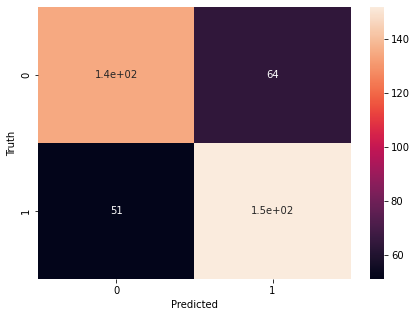

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       199
           1       0.70      0.75      0.73       203

    accuracy                           0.71       402
   macro avg       0.71      0.71      0.71       402
weighted avg       0.71      0.71      0.71       402



In [13]:
knn.predict([[-1.2,30]])

array([1], dtype=int64)

In [14]:
df0 = dataset_process[:1009]
df1 = dataset_process[1009:]


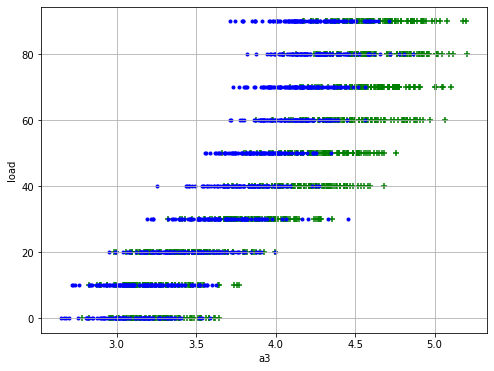

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#plt.scatter(X[:,0],X[:,2])
plt.scatter(df0['a3'], df0['load'],color="green",marker='+')
plt.scatter(df1['a3'], df1['load'],color="blue",marker='.')
plt.ylabel('load')
plt.xlabel('a3')
plt.grid()
